In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scmp-raw/scmp_spider.csv
/kaggle/input/spinarak-raw/spinarak_articles.csv


# Imports 
## Libraries

In [2]:
# usual libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

# libraries for data preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# libraries for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# libraries for model selection
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

# this setting widens how many characters pandas will display in a row:
pd.set_option('display.max_rows', 100)

## Data

In [4]:
# load data
#spinarak_df = pd.read_csv('/kaggle/input/spinarak-raw/spinarak_articles.csv', encoding='iso-8859-1')

In [5]:
#spinarak_df = spinarak_df.drop(spinarak_df.filter(regex='Unnamed:').columns, axis=1)

In [6]:
#spinarak_df.head(1)

In [7]:
#spinarak_df.dropna(subset=['source'], inplace=True)

In [8]:
#spinarak_df.shape

In [9]:
#spinarak_df.isnull().sum()

In [10]:
#spinarak_df.dropna(subset=['text'], inplace=True)

In [11]:
#spinarak_df.isnull().sum()

In [12]:
scmp_df = pd.read_csv('/kaggle/input/scmp-raw/scmp_spider.csv', encoding='iso-8859-1', index_col=0)

In [13]:
scmp_df.shape

(1636, 4)

In [14]:
# flatten df
scmp_df.columns = scmp_df.columns.map(''.join)
scmp_df = scmp_df.reset_index()

In [15]:
scmp_df.isnull().sum()

index        0
title       43
summary      0
url          0
source     403
dtype: int64

In [16]:
scmp_df.dropna(subset=['title', 'source'], inplace=True)

# Start Preprocessing

In [17]:
def clean_text(s):
    """
    Returns a cleaned version of the text by removing punctuations, digits. 
    Make upper case to lower case

    """
    s = s.lower() # make lower case
    s = re.sub(r'[^\w\s]','',s) # only words taken into account
    s = re.sub(r"\S*\d\S*", "", s).strip() # remove whitespaces and capture words with digits
    s = re.sub(r'\d+'," ", s) # this removes digit
    s = re.sub(r'_+'," ", s) # this removes underscore 
    s = re.sub(r'[^a-zA-Z0-9]+'," ", s) # special characters
    s = re.sub(r'-+', " ", s) # replace hyphens with spaces
    s = " ".join(s.split()) # remove extra whitespace
    return s

In [18]:
#spinarak_df['clean_text'] = spinarak_df['text'].apply(clean_text)

In [19]:
scmp_df.head()

,index,title,summary,url,source
0,Summit a âmajor diplomatic eventâ to boost Chinaâs ties with Central Asia,"Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit\nPresence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says\n",/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan,us_china_spider,China is expected to further boost ties with Central Asia when President Xi Jinping hosts his counterparts from the region amid uncertainties stemming from Russiaâs war in Ukraine and increasing hostility from the West. Beijing has hailed the two-day summit of nations in the vast and geo-strategically important neighbouring region on Thursday and Friday as the âfirst major diplomatic event...
1,US arrests man on charges of acting as unregistered foreign agent for Beijing,"Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.\n",/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing,us_china_spider,"A Chinese-American man was arrested last week for allegedly serving as an agent of the Chinese government without notifying the US government, the Department of Justice announced on Monday. Litang Liang, 63, of Brighton, Massachusetts, was accused of providing Chinese officials with information about Boston-area individuals and organisations; leading a counter-protest against anti-Beijing acti..."
2,"US report says China jailed as many as 10,000 religious adherents","Beijing has broadened its efforts to bring all theological activity under Communist Party control, according to annual State Department publication.\n",/news/china/article/3220659/us-religious-freedom-report-accuses-china-jailing-many-10000-people-repression-campaign,us_china_spider,"The US government on Monday accused Beijing of jailing as many as 10,000 or more people in 2022 in a widening campaign of repression against religious belief meant to bring all theological activity under the Chinese Communist Party âs control. The estimate of those imprisoned in the country ranging âfrom the low thousands to over 10,000â is one of many accusations contained in the State ..."
3,US citizen with Hong Kong residency given life sentence for spying in China,"John Shing-wan Leung, 78, was convicted and sentenced in Suzhou court on Monday for committing espionage activities in China.\n",/news/china/politics/article/3220562/hong-kong-resident-american-passport-sentenced-life-china-after-being-convicted-spying-charges,us_china_spider,"A US-based Hong Kong permanent resident â who is believed to have promoted business and cultural exchanges â was sentenced to life in prison on Monday after being convicted on spying charges in China. It comes as China is stepping up efforts targeting spies, especially those from the United States and its allies. But a lack of transparency around national security cases in China and âmut..."
4,ExplainerWhatâs Joe Biden up to on his 8-day trip to the Asia-Pacific?,The 80-year-old will visit a city that the US destroyed with a nuclear bomb and spend an awful lot of time with Indiaâs prime minister as he looks to demonstrate that he still has enough in the tank to handle the gruelling pace of the presidency.\n,/news/asia/article/3220558/whats-joe-biden-his-eight-day-trip-asia-pacific,us_china_spider,"US President Joe Biden has an ambitious agenda when he sets off this week on an eight-day trip to the Indo-Pacific . Heâs looking to tighten bonds with long-time allies, make history as the first sitting president of the United States to visit the tiny island state of Papua New Guinea and spotlight his administrationâs commitment to the Pacific. The three-country trip also 

In [20]:
scmp_df['clean_text'] = scmp_df['source'].apply(clean_text)

In [21]:
# tokenize with nltk
def tokenize_text(s):
    """Returns a message with word_tokenize package from nltk library"""
    return word_tokenize(s.lower())

In [22]:
#spinarak_df.head()

In [23]:
#spinarak_df['tokens'] = spinarak_df['clean_text'].apply(tokenize_text)

In [24]:
scmp_df['tokens'] = scmp_df['clean_text'].apply(tokenize_text)

In [25]:
scmp_df.shape

(1233, 7)

In [26]:
# remove rare words from both the df

# #count words
# from collections import Counter
# cnt = Counter()
# for text in spinarak_df["filtered_tokens"].values:
#     for word in text.split():
#         cnt[word] += 1
        
# cnt.most_common(10)

In [27]:
# remove stop words from the tokens from nltk.corpus for both the df

# include the common words found on the threads
english_stopwords = stopwords.words('english')
english_stopwords.extend(['hi', 'hello', 'welcome', 'roundup', 'said', 'would', 'also', 'us', 'china'])

In [28]:
def filtered_text(words):
    """Remove common english stop words from defined array. Also remove numbers"""
    filtered_words = [word for word in words if (word not in english_stopwords) and (not word.isdigit())]
    return filtered_words

In [29]:
#spinarak_df['filtered_tokens'] = spinarak_df['tokens'].apply(filtered_text)

In [30]:
scmp_df['filtered_tokens'] = scmp_df['tokens'].apply(filtered_text)

In [31]:
scmp_df.head()

,index,title,summary,url,source,clean_text,tokens,filtered_tokens
0,Summit a âmajor diplomatic eventâ to boost Chinaâs ties with Central Asia,"Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit\nPresence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says\n",/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan,us_china_spider,China is expected to further boost ties with Central Asia when President Xi Jinping hosts his counterparts from the region amid uncertainties stemming from Russiaâs war in Ukraine and increasing hostility from the West. Beijing has hailed the two-day summit of nations in the vast and geo-strategically important neighbouring region on Thursday and Friday as the âfirst major diplomatic event...,china is expected to further boost ties with central asia when president xi jinping hosts his counterparts from the region amid uncertainties stemming from russia s war in ukraine and increasing hostility from the west beijing has hailed the twoday summit of nations in the vast and geostrategically important neighbouring region on thursday and friday as the first major diplomatic event that ch...,"[china, is, expected, to, further, boost, ties, with, central, asia, when, president, xi, jinping, hosts, his, counterparts, from, the, region, amid, uncertainties, stemming, from, russia, s, war, in, ukraine, and, increasing, hostility, from, the, west, beijing, has, hailed, the, twoday, summit, of, nations, in, the, vast, and, geostrategically, important, neighbouring, region, on, thursday, ...","[expected, boost, ties, central, asia, president, xi, jinping, hosts, counterparts, region, amid, uncertainties, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nations, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, hosts, year, meeting, xian, northwestern, province, shaanxi, coincides, ..."
1,US arrests man on charges of acting as unregistered foreign agent for Beijing,"Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.\n",/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing,us_china_spider,"A Chinese-American man was arrested last week for allegedly serving as an agent of the Chinese government without notifying the US government, the Department of Justice announced on Monday. Litang Liang, 63, of Brighton, Massachusetts, was accused of providing Chinese officials with information about Boston-area individuals and organisations; leading a counter-protest against anti-Beijing acti...",a chineseamerican man was arrested last week for allegedly serving as an agent of the chinese government without notifying the us government the department of justice announced on monday litang liang of brighton massachusetts was accused of providing chinese officials with information about bostonarea individuals and organisations leading a counterprotest against antibeijing activists and sugg...,"[a, chineseamerican, man, was, arrested, last, week, for, allegedly, serving, as, an, agent, of, the, chinese, government, without, notifying, the, us, government, the, department, of, justice, announced, on, monday, litang, liang, of, brighton, massachusetts, was, accused, of, providing, chinese, officials, with, information, about, bostonarea, individuals, and, organisations, leading, a, cou...","[chineseamerican, man, arrested, last, week, allegedly, serving, agent, chinese, government, without, notifying, government, department, justice, announced, monday, litang, liang, brighton, massachusetts, accused, providing, chinese, officials, information, bostonarea, in

# Lematize the text

In [32]:
# initiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
def lemmatize_text(words):
    tokens_lem = [lemmatizer.lemmatize(w) for w in words]
    return tokens_lem

### why is this not working

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
import nltk

nltk.download("wordnet")

nltk.data.path.append('/kaggle/input')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [37]:
#spinarak_df['lem_tokens'] = spinarak_df['filtered_tokens'].apply(lemmatize_text)

In [38]:
scmp_df['lem_tokens'] = scmp_df['filtered_tokens'].apply(lemmatize_text)

In [39]:
scmp_df.head()

,index,title,summary,url,source,clean_text,tokens,filtered_tokens,lem_tokens
0,Summit a âmajor diplomatic eventâ to boost Chinaâs ties with Central Asia,"Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit\nPresence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says\n",/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan,us_china_spider,China is expected to further boost ties with Central Asia when President Xi Jinping hosts his counterparts from the region amid uncertainties stemming from Russiaâs war in Ukraine and increasing hostility from the West. Beijing has hailed the two-day summit of nations in the vast and geo-strategically important neighbouring region on Thursday and Friday as the âfirst major diplomatic event...,china is expected to further boost ties with central asia when president xi jinping hosts his counterparts from the region amid uncertainties stemming from russia s war in ukraine and increasing hostility from the west beijing has hailed the twoday summit of nations in the vast and geostrategically important neighbouring region on thursday and friday as the first major diplomatic event that ch...,"[china, is, expected, to, further, boost, ties, with, central, asia, when, president, xi, jinping, hosts, his, counterparts, from, the, region, amid, uncertainties, stemming, from, russia, s, war, in, ukraine, and, increasing, hostility, from, the, west, beijing, has, hailed, the, twoday, summit, of, nations, in, the, vast, and, geostrategically, important, neighbouring, region, on, thursday, ...","[expected, boost, ties, central, asia, president, xi, jinping, hosts, counterparts, region, amid, uncertainties, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nations, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, hosts, year, meeting, xian, northwestern, province, shaanxi, coincides, ...","[expected, boost, tie, central, asia, president, xi, jinping, host, counterpart, region, amid, uncertainty, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nation, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, host, year, meeting, xian, northwestern, province, shaanxi, coincides, leader,..."
1,US arrests man on charges of acting as unregistered foreign agent for Beijing,"Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.\n",/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing,us_china_spider,"A Chinese-American man was arrested last week for allegedly serving as an agent of the Chinese government without notifying the US government, the Department of Justice announced on Monday. Litang Liang, 63, of Brighton, Massachusetts, was accused of providing Chinese officials with information about Boston-area individuals and organisations; leading a counter-protest against anti-Beijing acti...",a chineseamerican man was arrested last week for allegedly serving as an agent of the chinese government without notifying the us government the department of justice announced on monday litang liang of brighton massachusetts was accused of providing chinese officials with information about bostonarea individuals and organisations leading a counterprotest against antibeijing activists and sugg...,"[a, chineseamerican, man, was, arrested, last, week, for, allegedly, serving, as, an, agent, of, the, chinese, government, without, notifying, the, us, government, the, department, of, justice, announced, on, monday, litang, liang, of, brighton, massachusetts, 

# n-grams

## SCMP n-gram

In [40]:
c_vec = CountVectorizer(stop_words=english_stopwords, ngram_range=(2,3))

# matrix of ngrams
ngrams = c_vec.fit_transform(scmp_df['lem_tokens'].map(' '.join))

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [41]:
# cnt_scmp = Counter()
# for text in scmp_df["filtered_tokens"].values:
#     for word in text:
#         cnt_scmp[word] += 1
        
# cnt_scmp.most_common(10)

In [42]:
scmp_top30_words = df_ngram.head(30)

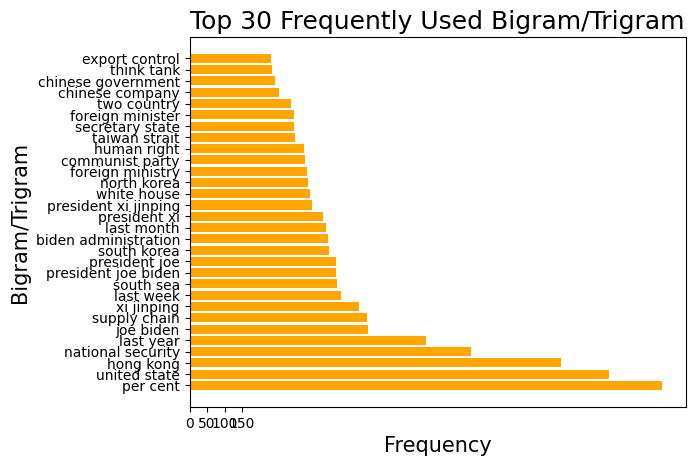

In [43]:
plt.barh(scmp_top30_words['bigram/trigram'], scmp_top30_words['frequency'], color='orange')
scmp_top30_words = scmp_top30_words.sort_values(by='frequency', ascending=False)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Bigram/Trigram', fontsize=15)
plt.xticks(np.arange(0, 200, step=50))
plt.title('Top 30 Frequently Used Bigram/Trigram', fontsize=18)
plt.show()

In [44]:
scmp_top30_words

,frequency,bigram/trigram
0,1351,per cent
1,1200,united state
2,1061,hong kong
3,804,national security
4,677,last year
5,509,joe biden
6,507,supply chain
7,485,xi jinping
8,433,last week
9,422,south sea


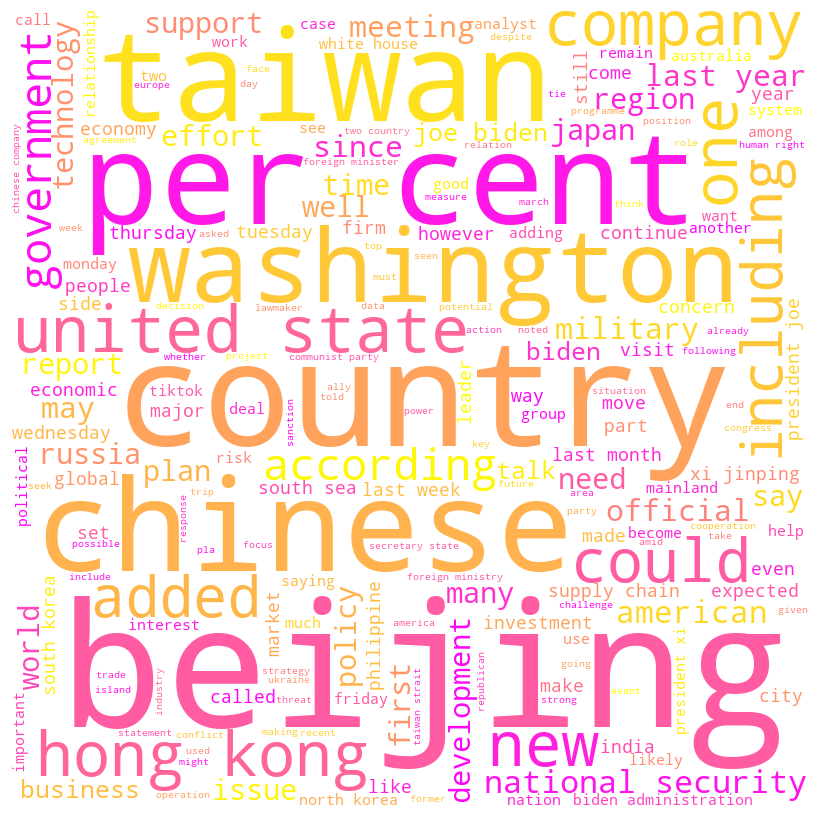

In [45]:
# generate a world cloud for exploratory analysis

comment_words = " "
stopwords = english_stopwords
 
# iterate through the csv file
for val in scmp_df['lem_tokens']:
     
    # typecaste each val to string
    val = str(val)
 
    tokens = re.findall(r'\b\w+\b', val)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)
 
wordcloud = WordCloud(width = 800, height = 800,
                colormap="spring",
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [46]:
df_ngram.head(100)

,frequency,bigram/trigram
0,1351,per cent
1,1200,united state
2,1061,hong kong
3,804,national security
4,677,last year
5,509,joe biden
6,507,supply chain
7,485,xi jinping
8,433,last week
9,422,south sea


## Spinarak's n-gram

In [47]:
# this is too huge, need to run it in cloud
# c_vec = CountVectorizer(stop_words=english_stopwords, ngram_range=(2,3))

# # matrix of ngrams
# ngrams = c_vec.fit_transform(spinarak_df['lem_tokens'].map(' '.join))

# # count frequency of ngrams
# count_values = ngrams.toarray().sum(axis=0)

# # list of ngrams
# vocab = c_vec.vocabulary_
# df_ngram_spinarak = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
#             ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [48]:
# df_ngram_spinarak.head(20)

In [49]:
#spinarak_df.to_csv('/kaggle/input/spinarak-raw/clean_spinarak.csv', index=False)

In [50]:
#scmp_df.to_csv('/kaggle/scmp-raw/clean-scmp.csv', index=False)

In [51]:
scmp_df.head()

,index,title,summary,url,source,clean_text,tokens,filtered_tokens,lem_tokens
0,Summit a âmajor diplomatic eventâ to boost Chinaâs ties with Central Asia,"Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit\nPresence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says\n",/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan,us_china_spider,China is expected to further boost ties with Central Asia when President Xi Jinping hosts his counterparts from the region amid uncertainties stemming from Russiaâs war in Ukraine and increasing hostility from the West. Beijing has hailed the two-day summit of nations in the vast and geo-strategically important neighbouring region on Thursday and Friday as the âfirst major diplomatic event...,china is expected to further boost ties with central asia when president xi jinping hosts his counterparts from the region amid uncertainties stemming from russia s war in ukraine and increasing hostility from the west beijing has hailed the twoday summit of nations in the vast and geostrategically important neighbouring region on thursday and friday as the first major diplomatic event that ch...,"[china, is, expected, to, further, boost, ties, with, central, asia, when, president, xi, jinping, hosts, his, counterparts, from, the, region, amid, uncertainties, stemming, from, russia, s, war, in, ukraine, and, increasing, hostility, from, the, west, beijing, has, hailed, the, twoday, summit, of, nations, in, the, vast, and, geostrategically, important, neighbouring, region, on, thursday, ...","[expected, boost, ties, central, asia, president, xi, jinping, hosts, counterparts, region, amid, uncertainties, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nations, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, hosts, year, meeting, xian, northwestern, province, shaanxi, coincides, ...","[expected, boost, tie, central, asia, president, xi, jinping, host, counterpart, region, amid, uncertainty, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nation, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, host, year, meeting, xian, northwestern, province, shaanxi, coincides, leader,..."
1,US arrests man on charges of acting as unregistered foreign agent for Beijing,"Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.\n",/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing,us_china_spider,"A Chinese-American man was arrested last week for allegedly serving as an agent of the Chinese government without notifying the US government, the Department of Justice announced on Monday. Litang Liang, 63, of Brighton, Massachusetts, was accused of providing Chinese officials with information about Boston-area individuals and organisations; leading a counter-protest against anti-Beijing acti...",a chineseamerican man was arrested last week for allegedly serving as an agent of the chinese government without notifying the us government the department of justice announced on monday litang liang of brighton massachusetts was accused of providing chinese officials with information about bostonarea individuals and organisations leading a counterprotest against antibeijing activists and sugg...,"[a, chineseamerican, man, was, arrested, last, week, for, allegedly, serving, as, an, agent, of, the, chinese, government, without, notifying, the, us, government, the, department, of, justice, announced, on, monday, litang, liang, of, brighton, massachusetts, 

In [52]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=818347 sha256=a28aca9b3cb0c3733465db8dcc927519ab2e59dad18b9fc435411324f4ef87dc
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=59217b3c92eff2bc61bbc7a08a812a6f1c22f6ca775b1999946c5b4c12307392
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7

In [53]:
from bertopic import BERTopic

In [54]:
from umap import UMAP

In [55]:
# reduce dimensionality with UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=42)
topic_model = BERTopic(umap_model=umap_model)

In [56]:
docs = [str(doc) for doc in scmp_df['lem_tokens']]

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [57]:
# what does this mean?
topic_model.visualize_term_rank(log_scale=True)

In [58]:
topic_model.visualize_heatmap()

In [59]:
topic_model.get_topic_freq().shape[0]

23

In [60]:
# obtain label and its topics. total 29 topics topics
for topic_id in range(topic_model.get_topic_freq().shape[0]):
    topic_labels = topic_model.get_topic(topic_id)
    print(f"Topic {topic_id}: {topic_labels}")

Topic 0: [('beijing', 0.018441557289436774), ('xi', 0.01826677382882753), ('country', 0.015852709772739944), ('biden', 0.014731140581087734), ('chinese', 0.014623559948999382), ('state', 0.014201746808655977), ('meeting', 0.013312837427812195), ('two', 0.012787130953976768), ('washington', 0.012618484925157984), ('taiwan', 0.012359262313248888)]
Topic 1: [('taiwan', 0.04077764368559904), ('military', 0.035372911994057385), ('pla', 0.03033411208879345), ('island', 0.023293142487937006), ('force', 0.02218267449590561), ('defence', 0.019454102791080556), ('nuclear', 0.019403765147749802), ('sea', 0.017810853871137507), ('aircraft', 0.017523538187976778), ('beijing', 0.016484180653258636)]
Topic 2: [('republican', 0.04665182822479862), ('house', 0.03063700343829526), ('tiktok', 0.02893665623129692), ('committee', 0.024051446363208776), ('bill', 0.02352134572680985), ('democrat', 0.02213593834393935), ('biden', 0.018937779591054783), ('senate', 0.01805112690022344), ('party', 0.016883036055

In [61]:
# now, i want to assign these label back into the document

In [62]:
scmp_df.head(10)

,index,title,summary,url,source,clean_text,tokens,filtered_tokens,lem_tokens
0,Summit a âmajor diplomatic eventâ to boost Chinaâs ties with Central Asia,"Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit\nPresence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says\n",/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan,us_china_spider,China is expected to further boost ties with Central Asia when President Xi Jinping hosts his counterparts from the region amid uncertainties stemming from Russiaâs war in Ukraine and increasing hostility from the West. Beijing has hailed the two-day summit of nations in the vast and geo-strategically important neighbouring region on Thursday and Friday as the âfirst major diplomatic event...,china is expected to further boost ties with central asia when president xi jinping hosts his counterparts from the region amid uncertainties stemming from russia s war in ukraine and increasing hostility from the west beijing has hailed the twoday summit of nations in the vast and geostrategically important neighbouring region on thursday and friday as the first major diplomatic event that ch...,"[china, is, expected, to, further, boost, ties, with, central, asia, when, president, xi, jinping, hosts, his, counterparts, from, the, region, amid, uncertainties, stemming, from, russia, s, war, in, ukraine, and, increasing, hostility, from, the, west, beijing, has, hailed, the, twoday, summit, of, nations, in, the, vast, and, geostrategically, important, neighbouring, region, on, thursday, ...","[expected, boost, ties, central, asia, president, xi, jinping, hosts, counterparts, region, amid, uncertainties, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nations, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, hosts, year, meeting, xian, northwestern, province, shaanxi, coincides, ...","[expected, boost, tie, central, asia, president, xi, jinping, host, counterpart, region, amid, uncertainty, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nation, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, host, year, meeting, xian, northwestern, province, shaanxi, coincides, leader,..."
1,US arrests man on charges of acting as unregistered foreign agent for Beijing,"Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.\n",/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing,us_china_spider,"A Chinese-American man was arrested last week for allegedly serving as an agent of the Chinese government without notifying the US government, the Department of Justice announced on Monday. Litang Liang, 63, of Brighton, Massachusetts, was accused of providing Chinese officials with information about Boston-area individuals and organisations; leading a counter-protest against anti-Beijing acti...",a chineseamerican man was arrested last week for allegedly serving as an agent of the chinese government without notifying the us government the department of justice announced on monday litang liang of brighton massachusetts was accused of providing chinese officials with information about bostonarea individuals and organisations leading a counterprotest against antibeijing activists and sugg...,"[a, chineseamerican, man, was, arrested, last, week, for, allegedly, serving, as, an, agent, of, the, chinese, government, without, notifying, the, us, government, the, department, of, justice, announced, on, monday, litang, liang, of, brighton, massachusetts, 

In [63]:
topic_model.visualize_documents(docs).write_html("/projections.html")

Batches:   0%|          | 0/39 [00:00<?, ?it/s]

In [64]:
topic_model.visualize_barchart(top_n_topics=25)

# there is a total of 23 topics this run

In [65]:
# Print the keywords for each topic
for i in range(27):
    print(f"Topic: {i}")
    print(topic_model.get_topic(i))
    print()

Topic: 0
[('beijing', 0.018441557289436774), ('xi', 0.01826677382882753), ('country', 0.015852709772739944), ('biden', 0.014731140581087734), ('chinese', 0.014623559948999382), ('state', 0.014201746808655977), ('meeting', 0.013312837427812195), ('two', 0.012787130953976768), ('washington', 0.012618484925157984), ('taiwan', 0.012359262313248888)]

Topic: 1
[('taiwan', 0.04077764368559904), ('military', 0.035372911994057385), ('pla', 0.03033411208879345), ('island', 0.023293142487937006), ('force', 0.02218267449590561), ('defence', 0.019454102791080556), ('nuclear', 0.019403765147749802), ('sea', 0.017810853871137507), ('aircraft', 0.017523538187976778), ('beijing', 0.016484180653258636)]

Topic: 2
[('republican', 0.04665182822479862), ('house', 0.03063700343829526), ('tiktok', 0.02893665623129692), ('committee', 0.024051446363208776), ('bill', 0.02352134572680985), ('democrat', 0.02213593834393935), ('biden', 0.018937779591054783), ('senate', 0.01805112690022344), ('party', 0.0168830360

In [66]:
# Update the topics and probabilities 
topics_final = topic_model.topics_
probabilities_final = pd.DataFrame(topic_model.probabilities_)

In [67]:
topic_distr, _ = topic_model.approximate_distribution(docs)

In [68]:
topic_model.visualize_distribution(topic_distr[1])

# this looks like an unevent distribution, so i will reduce the dimensions

In [69]:
probabilities_final

,0
0,0.256304
1,1.000000
2,0.000000
3,0.767568
4,0.965214
...,...
1228,0.580960
1229,0.732598
1230,1.000000
1231,0.544193


In [70]:
#topic_model.update_topics(docs, topics=new_topics) # stopped here, rerun the code again

In [71]:
topic_model.visualize_barchart(top_n_topics=20)

In [72]:
topic_model.get_topic_freq().shape[0]

23

In [73]:
topic_model.visualize_distribution(topic_distr[1])

In [74]:
# Include the topics into the scmp_df dataframe
scmp_df['topic'] = topics_final
probabilities_final = pd.DataFrame(probabilities_final)

# Concat the journals dataframe with the probabilities dataframe
scmp_df = pd.concat([scmp_df, probabilities_final], axis=1)

In [75]:
scmp_df.head(10)

,index,title,summary,url,source,clean_text,tokens,filtered_tokens,lem_tokens,topic,0
0,Summit a âmajor diplomatic eventâ to boost Chinaâs ties with Central Asia,"Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit\nPresence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says\n",/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan,us_china_spider,China is expected to further boost ties with Central Asia when President Xi Jinping hosts his counterparts from the region amid uncertainties stemming from Russiaâs war in Ukraine and increasing hostility from the West. Beijing has hailed the two-day summit of nations in the vast and geo-strategically important neighbouring region on Thursday and Friday as the âfirst major diplomatic event...,china is expected to further boost ties with central asia when president xi jinping hosts his counterparts from the region amid uncertainties stemming from russia s war in ukraine and increasing hostility from the west beijing has hailed the twoday summit of nations in the vast and geostrategically important neighbouring region on thursday and friday as the first major diplomatic event that ch...,"[china, is, expected, to, further, boost, ties, with, central, asia, when, president, xi, jinping, hosts, his, counterparts, from, the, region, amid, uncertainties, stemming, from, russia, s, war, in, ukraine, and, increasing, hostility, from, the, west, beijing, has, hailed, the, twoday, summit, of, nations, in, the, vast, and, geostrategically, important, neighbouring, region, on, thursday, ...","[expected, boost, ties, central, asia, president, xi, jinping, hosts, counterparts, region, amid, uncertainties, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nations, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, hosts, year, meeting, xian, northwestern, province, shaanxi, coincides, ...","[expected, boost, tie, central, asia, president, xi, jinping, host, counterpart, region, amid, uncertainty, stemming, russia, war, ukraine, increasing, hostility, west, beijing, hailed, twoday, summit, nation, vast, geostrategically, important, neighbouring, region, thursday, friday, first, major, diplomatic, event, host, year, meeting, xian, northwestern, province, shaanxi, coincides, leader,...",8.0,0.256304
1,US arrests man on charges of acting as unregistered foreign agent for Beijing,"Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.\n",/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing,us_china_spider,"A Chinese-American man was arrested last week for allegedly serving as an agent of the Chinese government without notifying the US government, the Department of Justice announced on Monday. Litang Liang, 63, of Brighton, Massachusetts, was accused of providing Chinese officials with information about Boston-area individuals and organisations; leading a counter-protest against anti-Beijing acti...",a chineseamerican man was arrested last week for allegedly serving as an agent of the chinese government without notifying the us government the department of justice announced on monday litang liang of brighton massachusetts was accused of providing chinese officials with information about bostonarea individuals and organisations leading a counterprotest against antibeijing activists and sugg...,"[a, chineseamerican, man, was, arrested, last, week, for, allegedly, serving, as, an, agent, of, the, chinese, government, without, notifying, the, us, government, the, department, of, justice, announced, on, monday, litang, liang, of, brig

In [76]:
# Export the journals dataframe as a csv file
scmp_df.to_csv('/kaggle/working/scmp_topics.csv', index=False)

In [77]:
from sentence_transformers import SentenceTransformer

In [78]:
docs = scmp_df['lem_tokens']
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
vectorizer_model = CountVectorizer(stop_words="english")
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

docs = docs.dropna()

embeddings = sentence_model.encode(docs.tolist(), show_progress_bar=True)

Batches:   0%|          | 0/39 [00:00<?, ?it/s]

In [79]:
# We reduce our embeddings to 2D as it will allows us to quickly iterate later on
docs = [str(doc) for doc in docs]

reduced_embeddings = UMAP(n_neighbors=10, n_components=2, 
                          min_dist=0.0, metric='cosine').fit_transform(embeddings)

# Train our topic model
topic_model = BERTopic(embedding_model=sentence_model, umap_model=umap_model, 
                       vectorizer_model=vectorizer_model, calculate_probabilities=True, nr_topics=40)
topics, probs = topic_model.fit_transform(docs, embeddings)

In [80]:
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings, 
                                hide_document_hover=True, hide_annotations=True)

In [81]:
# Using the embeddings of each outlier documents
# find the best matching topic embedding using cosine similarity.
new_topics = topic_model.reduce_outliers(docs, topics, probabilities=probs, strategy='probabilities')

In [82]:
# Put the codes back into the 

# Perform Classification

In [83]:
# label the document back